In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing 

In [351]:
data = pd.read_csv("titanic-passengers.csv", delimiter=";")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [352]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [353]:
#Numerical data
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [354]:
#Categorical data
data.describe(exclude=np.number)

,Survived,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,2,891,2,681,147,3
top,No,"Pengelly, Mr. Frederick William",male,1601,B96 B98,S
freq,549,1,577,7,4,644


In [356]:
#Finding missing values :
#number of nan values per column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [357]:
#replacing missing numerical values (Age) with the average : 
data.Age.fillna(data.Age.mean(), inplace = True)

In [358]:
#replacing missing categorical values (Embarked) with the most frequent value: 
data.Embarked.value_counts()
data.Embarked.fillna("S", inplace = True)

In [359]:
#deleting the column 'Cabin' because 77% of the values are missing
data = data.drop(columns=["Cabin"],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [360]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Visualization phase

    a. Gender

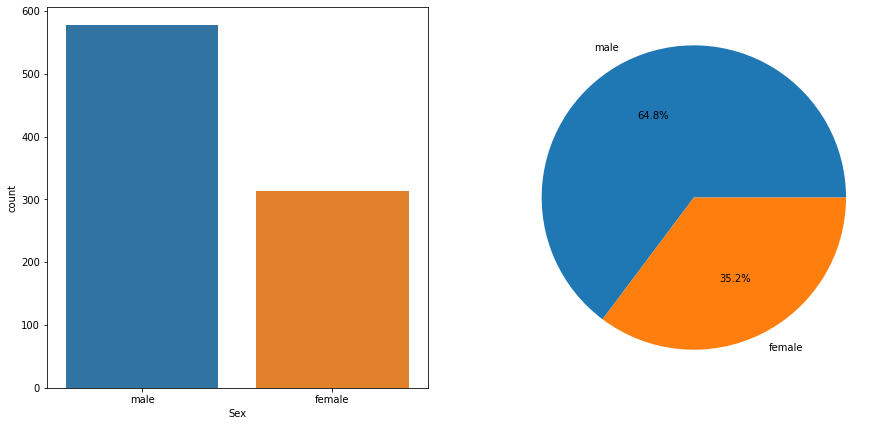

In [361]:
plots = plt.figure(figsize=[15,7])

#Histogram
plots.add_subplot(121)
sns.countplot(x='Sex',data=data)

#Pie chart
sexPie = [data.Sex[data.Sex == "male"].count(), data.Sex[data.Sex == "female"].count()]
labels = ["male", "female"]
plots.add_subplot(122)
plt.pie(sexPie, labels = labels, autopct='%1.1f%%')
plt.show()

    b. Class

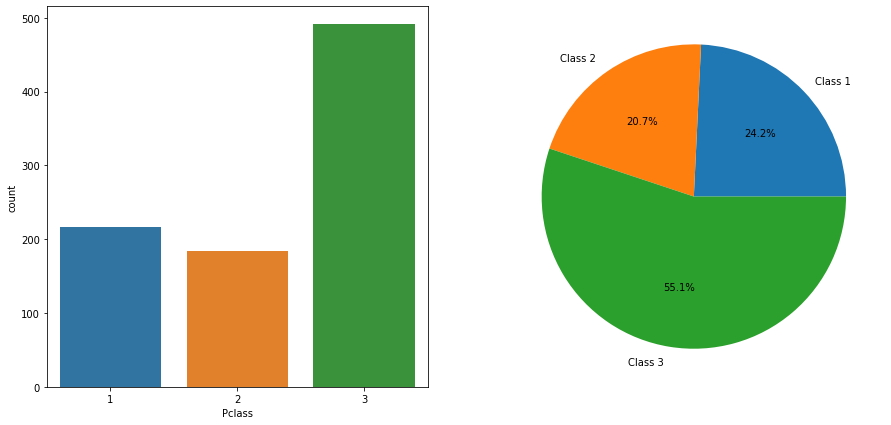

In [362]:
plots = plt.figure(figsize=[15,7])

#Histogram
plots.add_subplot(121)
sns.countplot(x='Pclass',data=data)

#Pie Chart
classpie = [data.Pclass[data.Pclass == 1].count(), data.Pclass[data.Pclass == 2].count(), data.Pclass[data.Pclass == 3].count()]
labels = ["Class 1 ", "Class 2 ", "Class 3 " ]
plots.add_subplot(122)
plt.pie(classpie, labels = labels, autopct='%1.1f%%')

plt.show()

    c. Embarked

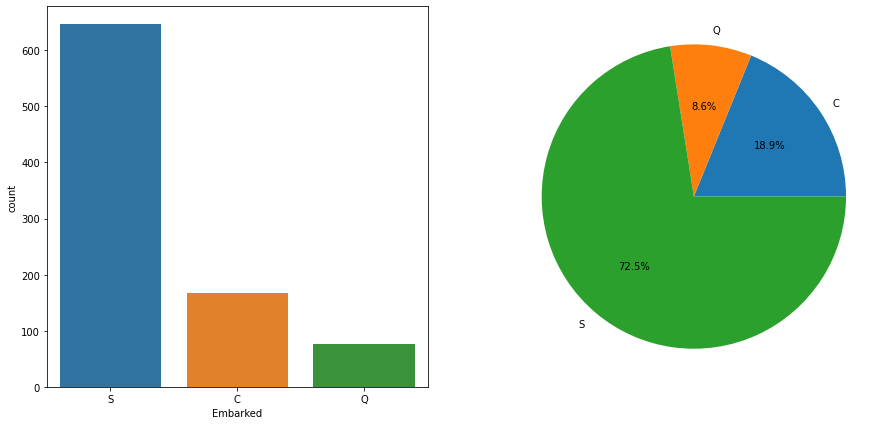

In [363]:
plots = plt.figure(figsize=[15,7])

#Histogram
plots.add_subplot(121)
sns.countplot(x='Embarked',data=data)

#Pie chart
EmbarkedPie = [data.Embarked[data.Embarked == "C"].count(), data.Embarked[data.Embarked == "Q"].count(), data.Embarked[data.Embarked == "S"].count()]
labels = ["C", "Q", "S"]
plots.add_subplot(122)
plt.pie(EmbarkedPie, labels = labels, autopct='%1.1f%%')
plt.show()

$Observation$
- The majority of passengers (72%) embarked in Southhampton (S) and only 9% of the passengers embarked in Queenstown (Q).

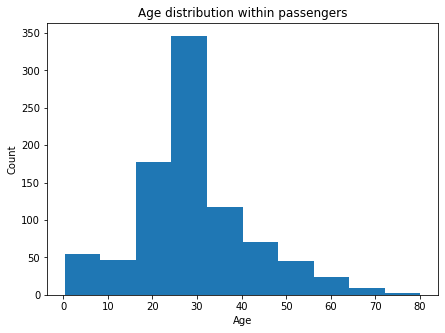

In [364]:
plt.figure(figsize=[7,5])
plt.hist(data.Age)
plt.title('Age distribution within passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

$Observation : $
- Most of the passengers have age between 16 and 40 years old

#### 2. Correlation between Sex and Age

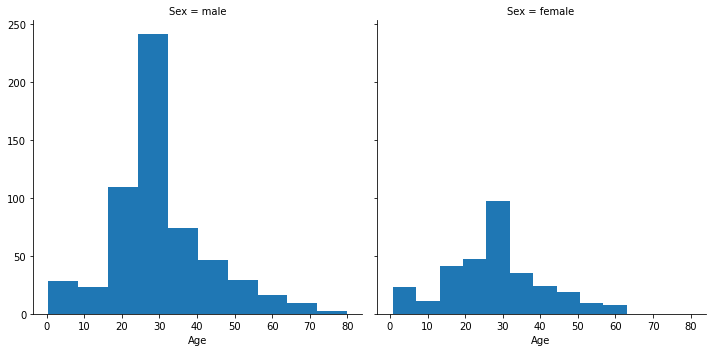

In [365]:
#c = sns.FacetGrid(data, col="Sex")
c = sns.FacetGrid(data, col="Sex", height=5, aspect=1)
c.map(plt.hist, "Age")
plt.show()

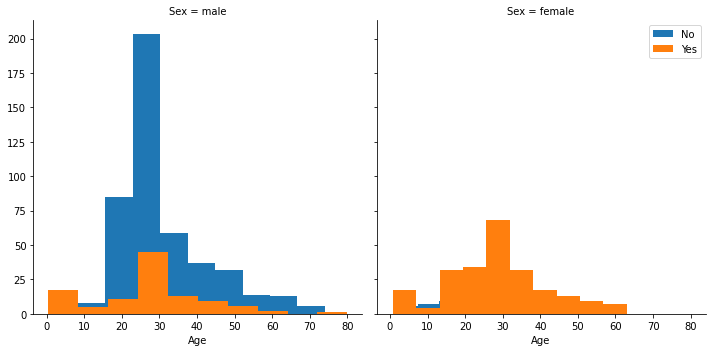

In [366]:
c = sns.FacetGrid(data, col="Sex", hue="Survived", height=5, aspect=1)
c.map(plt.hist, "Age")
plt.legend()
plt.show()

- Most of the females aged between 20 and 45 have a higher survival rate.
- As the age increases, the survival rate of males decreases. 

###### Distribution of survivors by gender (sex)

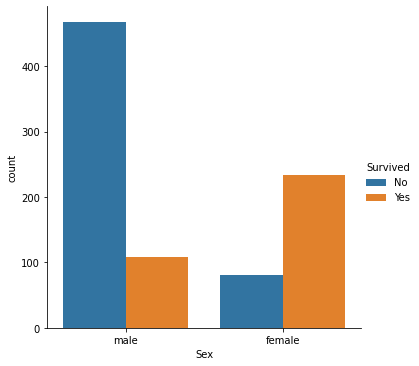

In [368]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = data)

The survival rate of females is higher than the male's survival rate. 

  **Distribution of survivors by class**

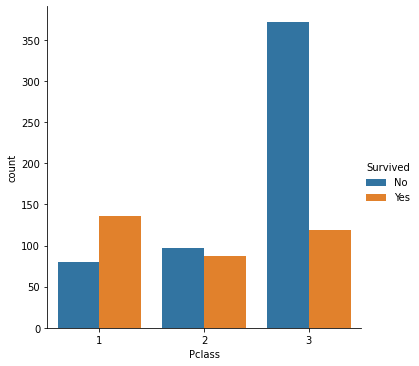

In [369]:
sns.catplot(x ="Pclass", hue ="Survived", kind ="count", data = data)

- First class passengers have a higher survival chance compared to second and third class passengers.
- Most of third class passengers didn't survive.<br/>
<br/> This implies that Pclass contributes to a passenger’s survival rate

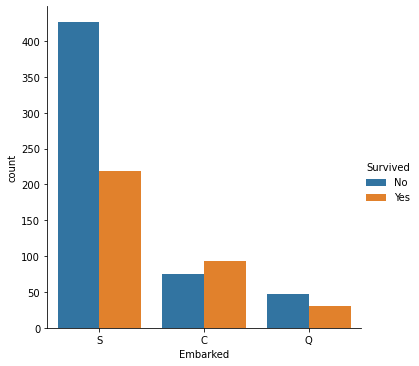

In [370]:
sns.catplot(x ="Embarked", hue ="Survived", kind ="count", data = data)

Passengers embarked in "C" had the highest survival rate.

$ Features $ $ transformation :$

In [371]:
#Convert important categorical features into numerical features  : 
cleanup_nums = {
    "Survived" : {"No": 0, "Yes":1},
    "Sex" : {"male": 0, "female":1},
    "Embarked" : {"C": 1, "Q": 2, "S": 3}
}
data.replace(cleanup_nums, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,3
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,3
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,3
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,3
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,3


* Heatmap : 

In [372]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

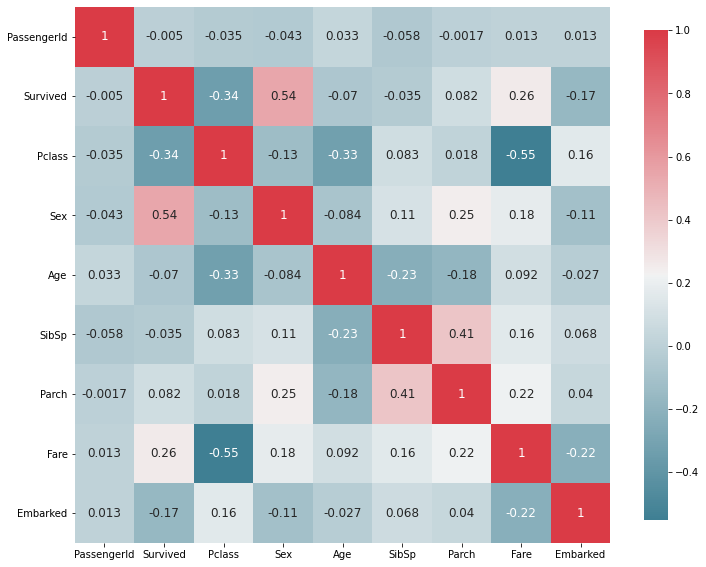

In [373]:
plot_correlation_map(data)

#### Analysis
This heatmap illustrate the correlations between the numerical featuress of the titanic dataset. Each square shows the correlation between the variables (features) on each axis. <br/>
It shows that : 
- The squares on the diagonal are all 1 (dark pink) because those squares are correlating each variable (feature) to itself so it's a perfect correlation.
- The correlation between 'PassengerId' and all the other features is closer to 0 which means that there is no linear relationship between the 'PassengerId' feature and the other features.
- 'Survived' feature has a strong positive correlation with the  'Sex' feature which means that a relationship exist between the individual gender and it's survival rate. 
- 'Survived' feature has a weak positive correlation (linear realtionship) with the 'Fare' feature. 
- 'Fare' and 'Pclass' features are negatively correlated (dark blue square). (1st class tickets are more expensive than 2nd and 3rd class tickets)
- There is a strong positive correlations between SibSp and Parch.
- There is a negative linear relationship (correlation) between the passenger class and it's survival rate. (This makes sens because 1st class pasengers have a high survival rate compared to the 3rd class passengers who have a lower survival rate meaning as class goes down (closer to 1) the surviavl rates goes up).